## Content

- Recap
- Distance between 2 planes
- How to find the halfspace a point belongs to
- Putting it all together Loss function
  - Mathematical representation
  - How to get loss function from gain function
- Perceptron learning algorithm
- Coding Perceptron learning algorithm
- Circle


## Recap

> Instructors note:

- Quickly revise the important topics as present in the attached screenshot


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/122/original/Screenshot_2023-09-13_at_2.11.59_PM.png?1694594551)


- Distance between origin and a line is given by $\frac{w_0}{\left||\bar{w}\right||}$
- Distance of a point from a line is given as $\frac{w_0'}{\left||\bar{w}\right||}$
  - Where $w_0'$ is nothing but replacing that point in the equation of the hyperplane


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/123/original/Screenshot_2023-09-13_at_2.14.14_PM.png?1694594666)


## Distance between 2 planes


Though we've used the word "planes", we will understand this concept using lines, since they are the planes in a 2-Dimensional context.

Suppose we have 2 parallel lines.

- If they are not parallel, then we will not have the concept of distance between them, as they will intersect.
- Therefore, when we talk about distance, we're talking about parallel lines / planes.

<br>

Since these lines are parallel, we can say that $w$ is same for both these lines, only the $w_0$ will be different.

Let's assume these lines are

- $l_1: w^T.x + 5$ and
- $l_2: w^T.x + 3$,

having the same $w$ vector.

Our goal is to calculate the distance $d$ (blue line segment)


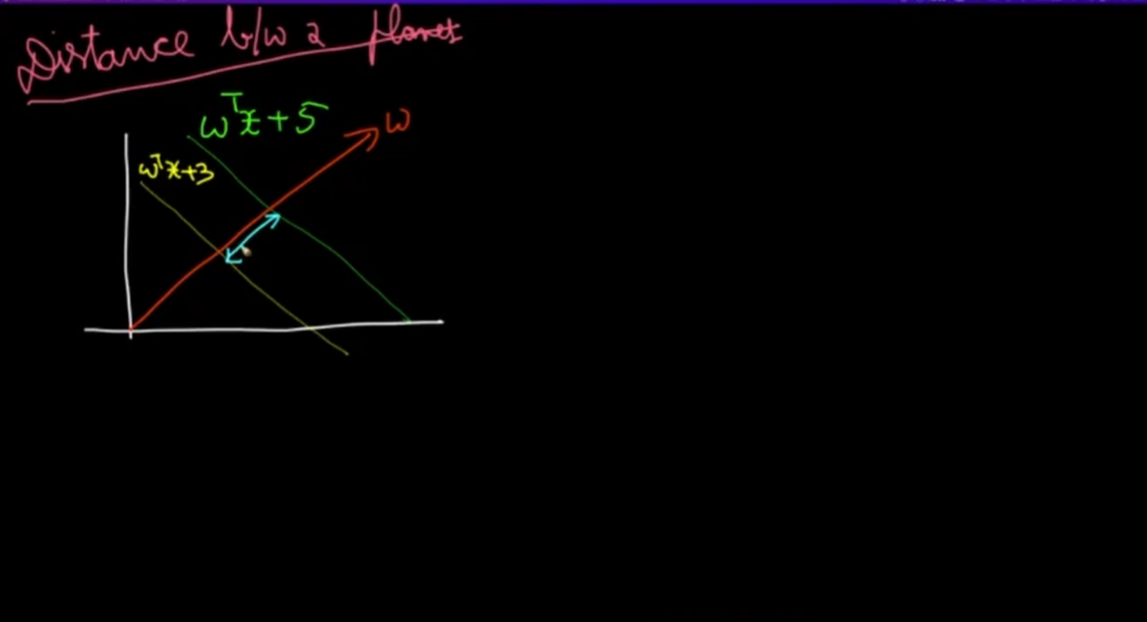


> **What approach can we use to calculate this blue distance?**

Let's first calculate the distance of line $l_1$ from the origin. This will be measured along the $w$ vector, as it is always perpendicular to the line $l_1$.

We've already seen from last class that is can be calculated as: $d = \frac{-w_0}{||w||}$

Hence, this becomes: $d_1 = \frac{5}{||w||}$

<br>

Similarly, we can find the distance between $l_2$ and origin as: $d_2 = \frac{3}{||w||}$

<br>

Now, we simply take their difference: $d = d_1 - d_2 = \frac{5-3}{||w||} = \frac{2}{||w||}$


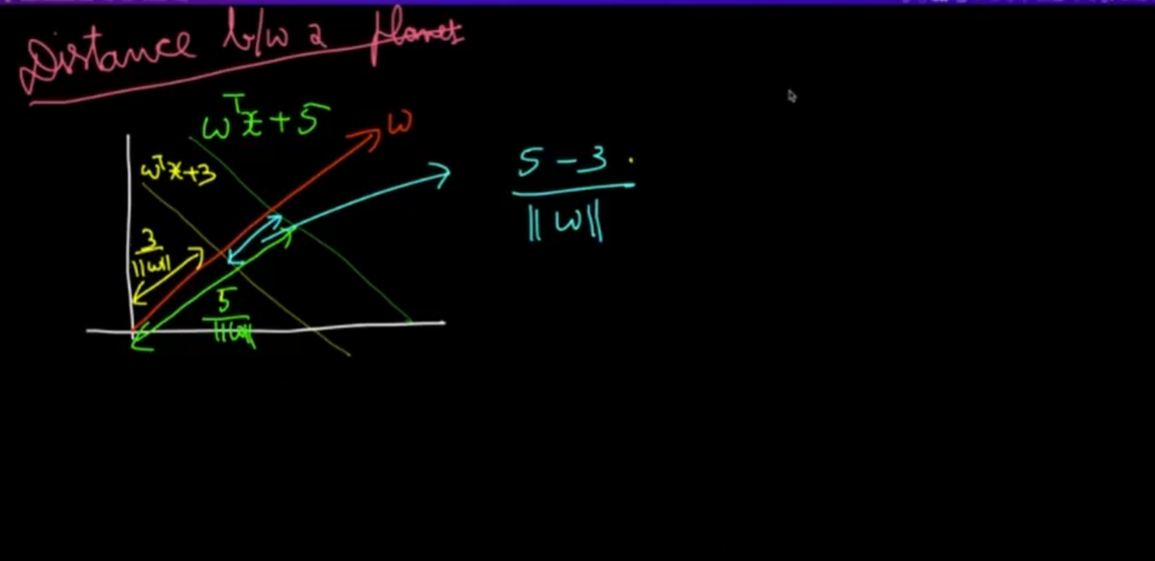


## How to find the halfspace a point belongs to


We covered about the Positive and negative half spaces in the previous class


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/127/original/Screenshot_2023-09-13_at_2.25.45_PM.png?1694595363)


Now let's understand it from the perspective of angle made by the point with the weight vector


We can see that when we can break the space into 4 seperate parts or quadrants

Next what we can do is for any given point we can draw a vector which originates from the line and goes towards that point as shown

We can then find the angle made by the new vector with the weight vector

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/133/original/Screenshot_2023-09-13_at_2.29.40_PM.png?1694595595)


We also studied that $cos(\theta)$ is positive from 0 to 90 degrees and from 270 to 360 degrees and it is negative from 90 to 270 degrees


We can say that the angle between the point/new vector and the weight vector would be less than 90 that is because we proved in the previous class that the angle made by the line and the weight vector is 90 degrees

**Scenario 1:**

- Based on this any vector we have in the left hand side of the positive half space where this new vector lies will always be between 0 to 90 degrees and thus $cos(\theta)$ will always be positive.


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/138/original/Screenshot_2023-09-13_at_2.38.35_PM.png?1694596146)


**Scenario 2:**

- if the vector lies in the 2nd quadrant that is in the left hand side of the negative half space then the angle will always be greater than 90 degrees and less than 180 degrees with respect to the weight vector
- Thus the value of the $cos(\theta)$ will always be negative in this space


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/140/original/Screenshot_2023-09-13_at_2.43.27_PM.png?1694596441)


**Scenario 3:**

- The point lies in the right hand side of the negative half space
- Thus here the angle made with the weight vector w would be between 180 to 270 degrees
- Thus we can say that the value of the $cos(\theta)$ would always be negative in this space


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/141/original/Screenshot_2023-09-13_at_2.46.29_PM.png?1694596605)


**Scenario 4**

- Here the point or the vector lies in the right hand side of the positive half space
- Here the angle with respect to the weight vector w would be between 270 to 360 degrees
- Thus we can say that in this region the value of $cos(\theta)$ would be postive.


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/142/original/Screenshot_2023-09-13_at_2.48.33_PM.png?1694596728)


Q. Now you must be wondering how is this going to help us?

- Now when we are doing binary classification let say to classify between cat and dogs
- Here matematically what we'll do is we'll assing a numeric value of 1 to class dog and numeric value of -1 to class cat
- Thus we say that the points lying in the positive half space belong to class 1
- And points belonging to negative half space belong to class -1
- **Note** here that instead of going with class 1 and 0 we are using class 1 and -1 the reason will become clear as we proceed ahead


## Putting it all together Loss function


Let's take a case where the green point lies in the wrong half space


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/144/original/Screenshot_2023-09-13_at_2.58.46_PM.png?1694597343)


Q. Can we say that this green point is miss classified

- Yes

Q. The actual label for this green point is 1 or -1?

- it is 1

Q. What is the assigned label ie label assigned based on the line

- it is -1

Let's create a vector starting from origin to this green point and name it $\bar{x}$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/146/original/Screenshot_2023-09-13_at_3.03.34_PM.png?1694597629)


Now the question is how would the classifier know which would be the best line such that it avoids such mistakes?
<br>

**So lets first undestand how will the classifier know that we have misclassified a point**

- The distance of the point $\bar{x}$ with respect to the line is
  - $\frac{\bar{w}^T\bar{x}+w_0}{\left||w\right||}$
  - this distance would come out to be negative this is because it is lying in the negative half space.
    - Why? because the value of the dot product $\bar{w}^T\bar{x}$ would be negative as the value of the $cos(\theta)$ would be negative in the negative half space we just saw this at the start.
  - And for the points lying in the positive hald space would have positive distance with respect to the line.
- So based on this can we do as follows:
  - We compute the distance of each point from the line and based on the sign of the distance we assign the label as follows
    - if distance is greater than 0 then we assign label as +1
    - if distance is less than 0 then we assign label as -1


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/148/original/Screenshot_2023-09-13_at_3.14.29_PM.png?1694598284)


Based on this we can say for the misclassified green point that the actual label is +1 and the assigned labelled is -1


Q. Which line in the figure given below is a better classifier?

- The left one is the best because points are far away from the classifier of both the classes
- So we want the points to be as far away as possible from our hyperplane so that we have a better confidence in a point belonging to a particular class.


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/174/original/Screenshot_2023-09-13_at_5.27.28_PM.png?1694606264)


Q. What can we say about the distances that is when we sum the distances of all the points from the hyperplane for the left classifer and the right classifier which one do you think will have a higher overall distance?

- the left one

So esentially if we want to find the best classifier the summation of the distances of the points from the hyperplane should be maximum.

- So we had an intution of what we want to do now we'll see how do we translate that to mathematics
- We want to take the distance between the feature vectors(points) and the line/hyperplane and our end goal is to maximize this distance


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/179/original/Screenshot_2023-09-13_at_5.38.19_PM.png?1694606917)


### Mathematical representation


Here we'll see how do we represent mathematically what we have studied till now this'll be helpful when we want to generalize the above observation to n data points and converting it into an equation.


Let say we have a dataset

- $X=\left\{\bar{x*i},y_i \right\}*{i=1}^n $
  - $\bar{x_i}$ is the data point or the feature vector
  - $y_i$ is the Actual label of the feature vector that is which class does it belong to
  - and $y_i$ will vary from +1 to -1 depending upon which half space the data point lies
    - $y_i=+1$ it means that it belongs to positive halfspace
    - $y_i=-1$ it means that it belongs to negative halfspace
- Equation of our classifier is: $\bar{w}^T\bar{x}+w_0=0$
- Now maximizing the sum of distances between the feature vector and the classifer we call this as a **Gain function** which is written as follows:
  - $G(X,\bar{w},w_0)=\sum_{i=1}^n({\frac{\bar{w}^Tx_i+w_0}{\left||w\right||}})$
  - Here $X$, $\bar{w}$ and $w_0$ are input to the function
    - where X is the dataset
    - $\bar{w}$ and $w_0$ are the learnable parameters


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/188/original/Screenshot_2023-09-13_at_6.05.46_PM.png?1694608557)


There's one problem with the gain function that we defined above let's understand that problem

- As shown below we have 2 points one lying in the positive half space with the distance of 2 from the line and other in the negative half space with the distance of 3 in the negative half space

Q. What would the total distance be for this scenarios?

- it'll be -1 because distacnes lying in the negative half space will be negative
- So we can see that the distances in the negative half space are cancelling or reducing the overall distance that we are computing


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/187/original/Screenshot_2023-09-13_at_6.04.55_PM.png?1694608511)


Q. Since we want to maximize the distance ie instead of getting the answer as -1 we want the answer as 3 what can we do here?

- Here we only care about the magnitude and not the direction of the vector when performing the summation.
- To solve this there let's look at possible solutions
  1. **Taking Absolute value of distances**
  - There's a problem with this which is this function |x| is non differentiable at x=0, we'll see in the upcoming classes why this matters
  2. **Taking suqares of the distances**
  - In the upcoming classes we'll see that we have to compute the differntitation of this gain function so why to un-necessary complicate things.
  3. **Multiply the actual class labels with the distances**
  - We can multiply the actual class lable with the distances as they are one they wont change the distances and negative distances in the negative half spaces with lables as -1 when multipled will become positive


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/189/original/Screenshot_2023-09-13_at_6.17.48_PM.png?1694609284)


Thus now our updated gain function is

- $G(X,\bar{w},w_0)=\sum_{i=1}^n({\frac{\bar{w}^Tx_i+w_0}{\left||w\right||}})y_i$
- This is also one of the reason to use the labels as +1 and -1 and not 0 and 1


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/190/original/Screenshot_2023-09-13_at_6.18.49_PM.png?1694609345)


In order to find out the best classifier we need to maximize the gain function $G$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/192/original/Screenshot_2023-09-13_at_6.34.13_PM.png?1694610269)


### How to get loss function from the Gain function


Loss function is nothing but negative of the gain function

- So when we are maximizing the Gain function we say that we are minizing the loss function.
- And the end goal of any Machine learning algorithm is to minimize the loss function.
- This loss function keeps on changing depends upon the algorithm we have


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/197/original/Screenshot_2023-09-13_at_6.38.21_PM.png?1694610516)


## Perceptron Learning algorithm


**Problem formulation:**

- We can see that a red point is misclassified in the below attached screenshot
  - we identify that by comparing the actual label and the assigned label if they do not match then it is misclassified.
  - Here $y_i$ is the actual class label

Now how should we update the weight vector that is change the line or the hyerplane so that it can fix this error of misclassifying the data point?


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/199/original/Screenshot_2023-09-13_at_6.41.32_PM.png?1694610711)


Let's see how to update our weight vector

- here we can see that the vector $\bar{x}$ is missclassified
  ![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/200/original/Screenshot_2023-09-13_at_6.47.11_PM.png?1694611044)


Let's analyze what this weight vector is geometrically

- the weight vector is nothing but our [$w_1$, $w_2$] and when we change them we are esentially changing the slope of the line
- Now let's see what happens when we fix $w_2$ and $w_0$ and change $w_1$
  - Use desmos to demostrate this: https://www.desmos.com/calculator/vlrwndsxye
  - we can see that there is a pivot on the y-axis which changes the slope of the line around that pivot point ie the line start rotating on the y-intercept


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/207/original/Screenshot_2023-09-13_at_6.52.00_PM.png?1694611340)


- Now let's see what happens when we fix $w_1$ and $w_0$ and change $w_2$
  - Use desmos to demostrate this: https://www.desmos.com/calculator/vlrwndsxye
  - we can see that there is a pivot on the x-axis which changes the slope of the line around that pivot point ie the line start rotating on the x-intercept

**Takeaway:**

- When we are changing $w_1$ we fixed the point on y axis and then changing the slope
- When we are changing $w_2$ we fixed the point on x axis and then changing the slope


Coming back to our original problem that we have to change or shift this line somehow so that the misclassified red point comes under the right region

- To do that we have 2 ways
  1. We can rotate the w in anticlockwise direction till the red point lies in the correct region.
  - Refer: [here](https://drive.google.com/file/d/10QuYXs1bD3LbiWrDKMepHPrwVGVDBjUT/view?usp=sharing)
  2. We can rotate the w in clockwise direction till the red point lies in the correct region.
  - Refer: [Here](https://drive.google.com/file/d/1aC-ghKiituS1ipJ_zPsXwcY3DxjBbpOq/view?usp=sharing)

Q. Which do you think is better to move the line clockwise or anticlockwise?

- Anticlockwise
- Why? because we reach to the solution faster
- After this translation and rotation of the weight vector we get a new w vector and a new line correponding to that weight vector.


Q. Can we find the $w_{new}$ using the old weight vector $w_{old}$ ?

- Yes
- we'll use vector algebra to get this as shown below
  - to do this we transfer the $-\bar{x}$ vector and let it sit at the tip of the $w_{old}$ vector
  - thus the resultant vector $w_{new}$ would simply be the addition of the 2 vectors.
- Below is just the vector representation of vectors $w_{old}$, $w_{new}$ and $\bar{x}$ and applying vector algebra to it we get
- $w_{new}= w_{old} -\bar{x}$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/226/original/Screenshot_2023-09-13_at_7.56.47_PM.png?1694615223)


**Note:**

- This is the case for Anticlockwise direction
- And the assigned lablel according to the $w_{old}$ classifier is +1 and the actual label is -1


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/234/original/Screenshot_2023-09-13_at_8.07.43_PM.png?1694615879)


Now let's see for the clockwise direction

here the scenario is such that the green point is missclassified as red point which means it lies in the negative half space as we can see below


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/294/original/Screenshot_2023-09-13_at_11.42.46_PM.png?1694628782)


So now in this situation we can rotate the w vector clockwise and also anticlockwise but if we observe carefully then we can say that by rotating the w vector clockwise we are able to correct the mis classification faster


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/296/original/Screenshot_2023-09-13_at_11.46.44_PM.png?1694629019)


Vector algebra to our rescue

- we can now write $w_{new}$ in terms of $w_{old}$ as follows
- $w_{new}=w_{old}+x$
- This is for the clockwise direction rotation
- And the assigned lable to the $\bar{x}$ was -1 and the actual label was +1


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/297/original/Screenshot_2023-09-13_at_11.50.25_PM.png?1694629241)


**Let's summarise our perceptron learning algorithm**

- There are 2 ways in which we can update our $w$ vector
  - One is when we rotate the w vector clockwise
    - here the actual label is +1 and assigned label is -1
    - for this case we update the weight vector as $w_{new}=w_{old}+x$
  - other is when we rotate the w vector anticlockwise
    - here the actual label is -1 and the assigned label is +1
    - for this case we update the weight vector as $w_{new}=w_{old}-x$
- in both the cases our $\bar{x}$ is misclassified


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/298/original/Screenshot_2023-09-13_at_11.57.06_PM.png?1694630064)


**Geometric interpretation of vector addition**


- if we add a vector $\bar{x}$ which is in anti-clockwise position to our $w_{old}$ vector then it'll move our $w_{old}$ in the anti-clockwise direction.
- if we add a vector $\bar{x}$ which is in clockwise position to our $w_{old}$ vector then it'll move our $w_{old}$ in the clockwise direction.
- This implies that vector addition has a simple rotation effect on the original vector.
  - here our original vector is $w_{old}$


Q. Can we rewrite our $w_{new}$ equation for clockwise and anticlockwise as follows?

- For clockwise $w_{new}=w_{old}+x(+1)$
- For anticlockwise $w_{new}=w_{old}+x(-1)$

Q. Now can we get this +1 and -1 with the availabel data?

- Yes our class labels
- So we can generalize this equation as follows
  - $w_{new}=w_{old}+x*y_i$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/299/original/Screenshot_2023-09-14_at_12.09.33_AM.png?1694630389)


## Coding Perceptron learning algorithm


### Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### Creating the dataset


In [ ]:
x,y=datasets.make_blobs(n_samples=200,
                   n_features=2,
                   centers=[[2,2],[10,10]],
                   center_box=(0,10),
                   cluster_std=3)

In [ ]:
# x

In [ ]:
# y

In [ ]:
# this is to ensure that wherever we have class label as 0 convert it into -1
y[y==0]=-1
# y

### Visualise the Dataset


Q. if we have a equation of line as $w_1x_1+w_2x_2+w_0=0$ then we can represent it in terms of y as?

- $y=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}$
- $y=\frac{-w_1x_1-w_0}{w_2}$
- **Note:** here $y$ and $x_2$ mean the same thing

Q. Do we have this weight vectors?

- In order to start somewhere we have to define a rnadom line
- the best way to do this is to define the weight vector from a nromal distibution


In [ ]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val= (-w[0]*x_val-w0)/w[1]
    plt.plot(x_val,y_val)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()

In the above code

```
y_val= (-w[0]*x_val-w0)/w[1]
```

- w[0] is nothing but $w_1$
- w[1] is nothing but our $w_2$
- since the w vector is stored as a list and indexing in list starts from 0 we are accessing them via the index


In [ ]:
# defining a random weight vetor and the w0 from a normal distibution
w=np.random.normal(size=(2,))
w0=np.random.normal()
print(w,w0)
print(w[0],w[1],w0)

[-0.62925507 -2.1004995 ] -0.19723203407526538
-0.6292550690186788 -2.1004995025240025 -0.19723203407526538


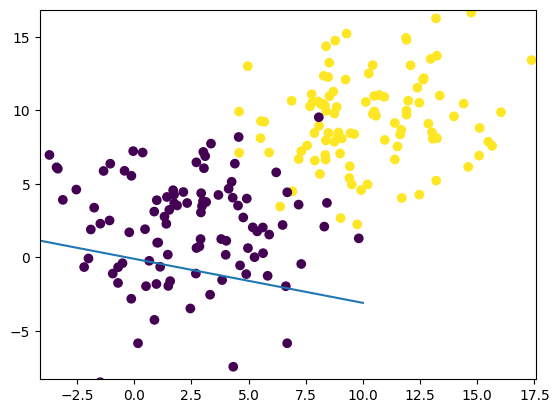

In [ ]:
show(w,w0,x,y)

### Implementing Perceptron Algorithm


In [ ]:
# computing distance from the hyperplane

def dist_from_hyperplane(w,w0,x):
    d = (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d

**np.linalg.norm(w)** is a function to compute the norm of a given vector it is same as computing $\sqrt{w_1^2+w_2^2}$


In [ ]:
#training the perceptron model

def perceptron_training(x,y,w,w0,num_iter=100):
    for i in range(num_iter):
        print("Iteration Number : ",i+1)
        miss_classified_points=0
        for (xi,yi) in zip(x,y):
            d=dist_from_hyperplane(w,w0,xi)
            hs = np.sign(d) #........this gives us the assigned label
            if hs != np.sign(yi): #.......here we are checking if the assigned and the actual label is same or not
                miss_classified_points += 1
                w = w + (xi*yi)
                w0 = w0 + np.sign(yi)
        print(f"Current Accuracy : {100-(100*miss_classified_points/len(y))}")
        print(f"Weights are W1 : {w[0]}, W2 : {w[1]}, W0 : {w0}")
        show(w,w0,x,y)
        if miss_classified_points==0:
            return w,w0
    return w, wo

In the equation of line if we keep $w_1$ and $w_2$ constant and change $w_0$ we saw that the line was up and down basically it was changing the intercepts.

Thus in order to update the $w_0$ we don't multiply anything rather we just add by how much units we have to move up or down hence the code
**w0 = w0 + np.sign(yi)**

- here the sign tells us whether to move up or down


Iteration Number :  1
Current Accuracy : 68.0
Weights are W1 : 11.054676066264346, W2 : -3.703313358255216, W0 : -30.229798918239


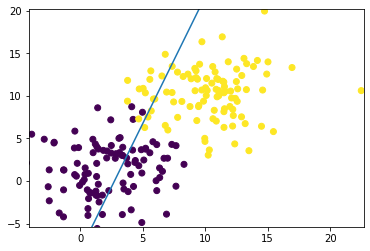

Iteration Number :  2
Current Accuracy : 82.0
Weights are W1 : 7.735028233095618, W2 : 4.631548955322011, W0 : -44.229798918239


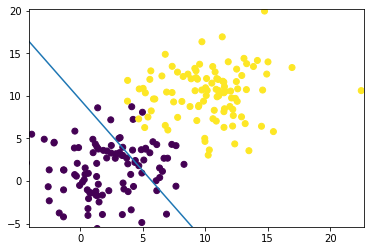

Iteration Number :  3
Current Accuracy : 80.5
Weights are W1 : 8.45254997176973, W2 : 5.733033922057875, W0 : -57.229798918239


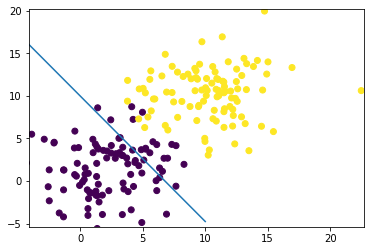

Iteration Number :  4
Current Accuracy : 87.5
Weights are W1 : 7.738945100335591, W2 : 12.045076572065787, W0 : -64.229798918239


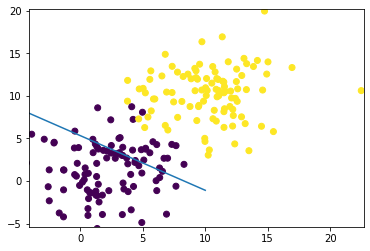

Iteration Number :  5
Current Accuracy : 89.0
Weights are W1 : 10.458041757756103, W2 : 12.187835615204223, W0 : -70.229798918239


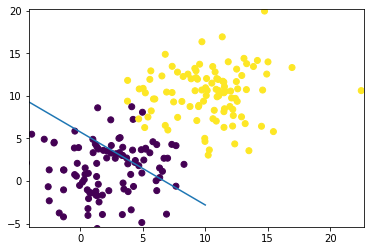

Iteration Number :  6
Current Accuracy : 86.0
Weights are W1 : 9.733508160903288, W2 : 15.114366605846039, W0 : -78.229798918239


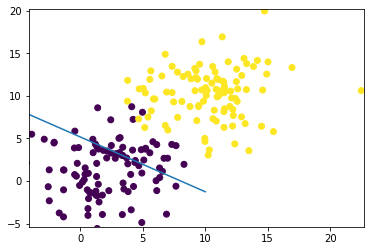

Iteration Number :  7
Current Accuracy : 89.5
Weights are W1 : 14.434759083073793, W2 : 7.0341743469478955, W0 : -85.229798918239


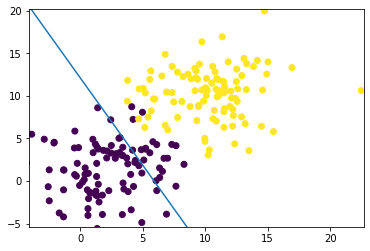

Iteration Number :  8
Current Accuracy : 94.5
Weights are W1 : 15.832548225844427, W2 : 5.64027147844278, W0 : -88.229798918239


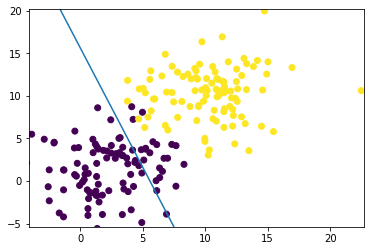

Iteration Number :  9
Current Accuracy : 93.0
Weights are W1 : 5.733927646829305, W2 : 10.65658405776715, W0 : -92.229798918239


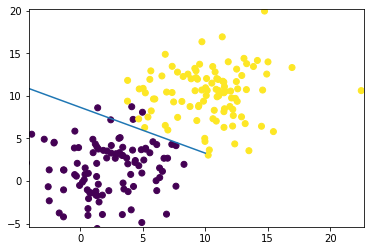

Iteration Number :  10
Current Accuracy : 92.0
Weights are W1 : 5.553698445866666, W2 : 11.003944344785223, W0 : -96.229798918239


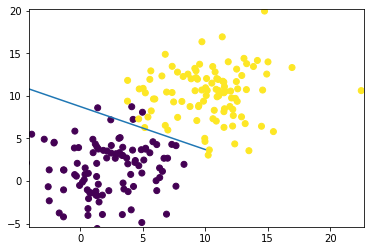

Iteration Number :  11
Current Accuracy : 93.0
Weights are W1 : 9.915270797358078, W2 : 17.172790935561522, W0 : -98.229798918239


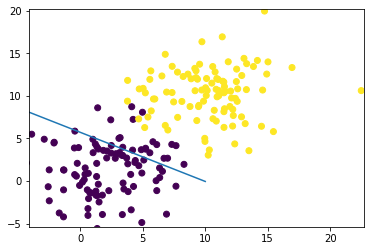

Iteration Number :  12
Current Accuracy : 90.5
Weights are W1 : 11.164935924752793, W2 : 10.995814056676902, W0 : -103.229798918239


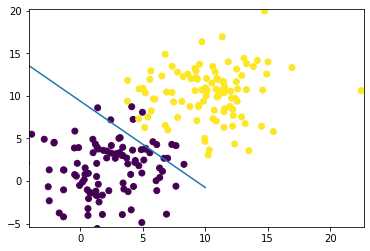

Iteration Number :  13
Current Accuracy : 91.0
Weights are W1 : 8.59191104952381, W2 : 20.46956708254809, W0 : -107.229798918239


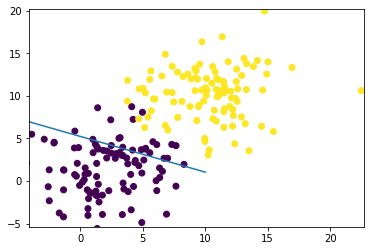

Iteration Number :  14
Current Accuracy : 91.5
Weights are W1 : 6.354994401451756, W2 : 13.01795665462148, W0 : -112.229798918239


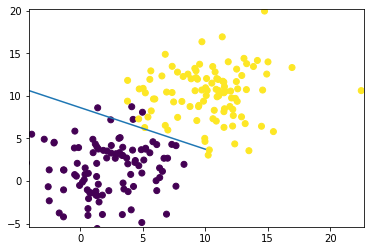

Iteration Number :  15
Current Accuracy : 94.0
Weights are W1 : 11.131265726798244, W2 : 11.835919195126698, W0 : -114.229798918239


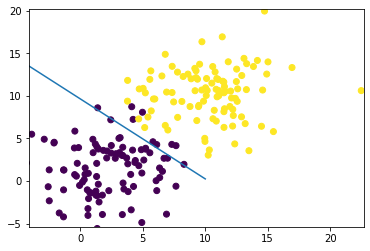

Iteration Number :  16
Current Accuracy : 92.5
Weights are W1 : 11.270704540032227, W2 : 12.080679799857668, W0 : -117.229798918239


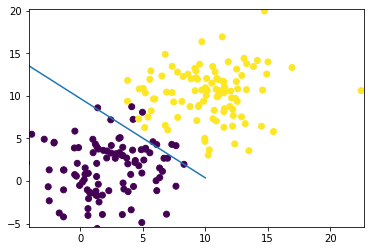

Iteration Number :  17
Current Accuracy : 93.5
Weights are W1 : 12.374106829572494, W2 : 10.32163529088415, W0 : -120.229798918239


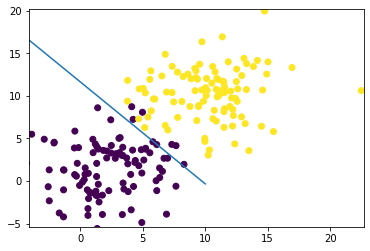

Iteration Number :  18
Current Accuracy : 93.5
Weights are W1 : 10.990794797468563, W2 : 11.216157150292975, W0 : -123.229798918239


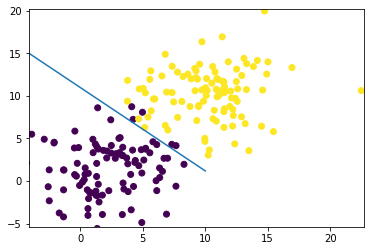

Iteration Number :  19
Current Accuracy : 94.0
Weights are W1 : 10.427216318589924, W2 : 18.381776088791362, W0 : -125.229798918239


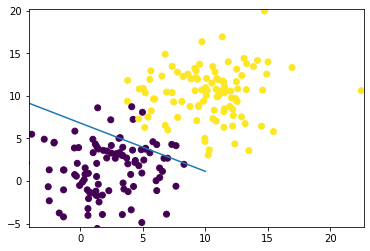

Iteration Number :  20
Current Accuracy : 93.0
Weights are W1 : 10.094076601345844, W2 : 18.986351064191958, W0 : -127.229798918239


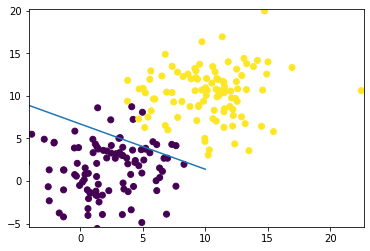

Iteration Number :  21
Current Accuracy : 93.0
Weights are W1 : 9.760936884101763, W2 : 19.590926039592553, W0 : -129.229798918239


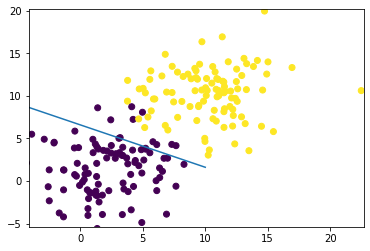

Iteration Number :  22
Current Accuracy : 93.0
Weights are W1 : 9.427797166857683, W2 : 20.195501014993148, W0 : -131.229798918239


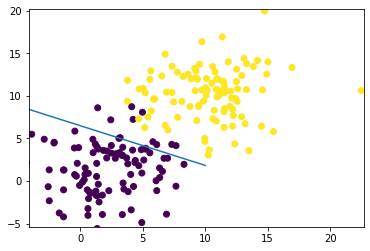

Iteration Number :  23
Current Accuracy : 93.0
Weights are W1 : 9.094657449613603, W2 : 20.800075990393744, W0 : -133.229798918239


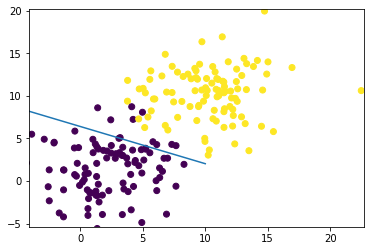

Iteration Number :  24
Current Accuracy : 93.0
Weights are W1 : 8.761517732369523, W2 : 21.40465096579434, W0 : -135.229798918239


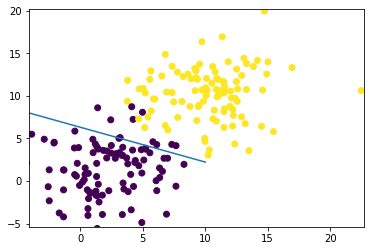

Iteration Number :  25
Current Accuracy : 94.0
Weights are W1 : 18.948428821645862, W2 : 15.815412857860803, W0 : -137.229798918239


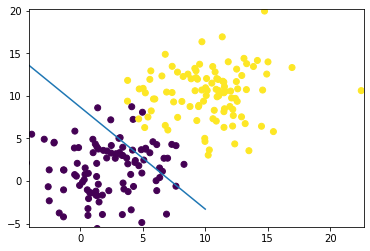

Iteration Number :  26
Current Accuracy : 93.0
Weights are W1 : 13.477272652211521, W2 : 12.918330453984515, W0 : -141.229798918239


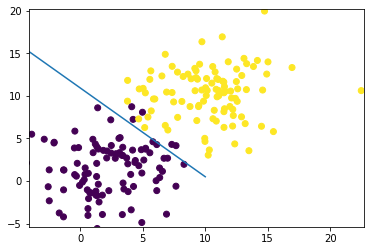

Iteration Number :  27
Current Accuracy : 93.0
Weights are W1 : 19.108099815113675, W2 : 17.511877166750956, W0 : -143.229798918239


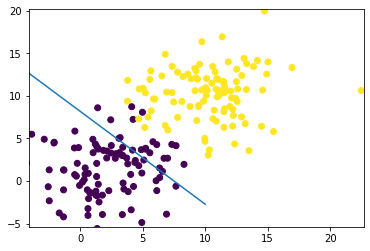

Iteration Number :  28
Current Accuracy : 93.5
Weights are W1 : 19.000711937599014, W2 : 17.278535596883003, W0 : -146.229798918239


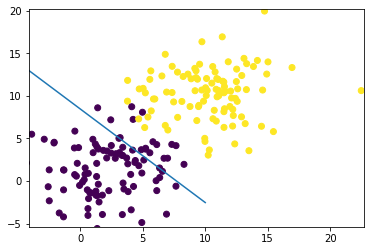

Iteration Number :  29
Current Accuracy : 94.0
Weights are W1 : 15.780406078872536, W2 : 19.349688339894037, W0 : -148.229798918239


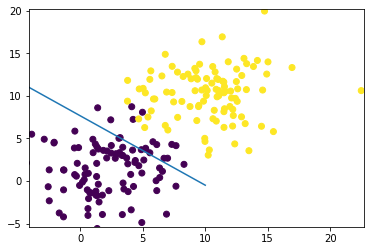

Iteration Number :  30
Current Accuracy : 96.5
Weights are W1 : 17.0143325472866, W2 : 19.331318103032864, W0 : -149.229798918239


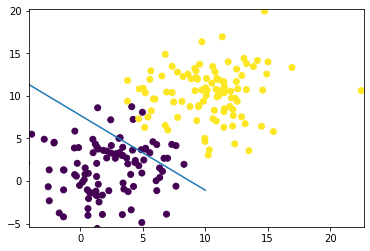

Iteration Number :  31
Current Accuracy : 95.5
Weights are W1 : 12.882178797901808, W2 : 22.169333939656056, W0 : -150.229798918239


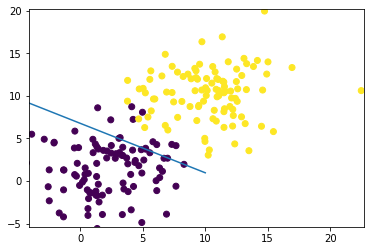

Iteration Number :  32
Current Accuracy : 93.5
Weights are W1 : 19.284885329152445, W2 : 17.544281550592743, W0 : -151.229798918239


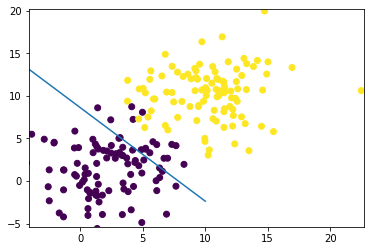

Iteration Number :  33
Current Accuracy : 94.5
Weights are W1 : 19.687546809371355, W2 : 18.185008839863038, W0 : -152.229798918239


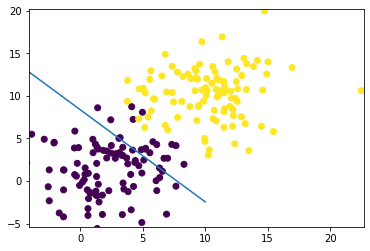

Iteration Number :  34
Current Accuracy : 94.0
Weights are W1 : 13.81035288216369, W2 : 21.73095421969027, W0 : -154.229798918239


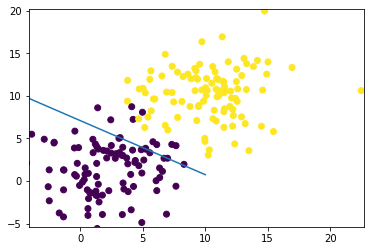

Iteration Number :  35
Current Accuracy : 93.5
Weights are W1 : 20.21305941341432, W2 : 17.105901830626955, W0 : -155.229798918239


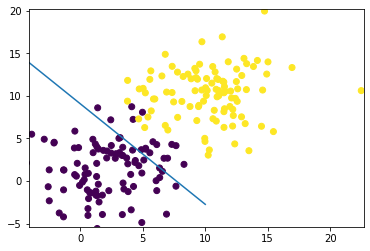

Iteration Number :  36
Current Accuracy : 94.5
Weights are W1 : 20.61572089363323, W2 : 17.74662911989725, W0 : -156.229798918239


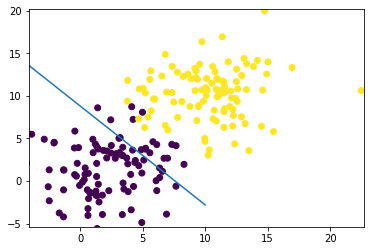

Iteration Number :  37
Current Accuracy : 94.0
Weights are W1 : 17.39541503490676, W2 : 19.817781862908284, W0 : -158.229798918239


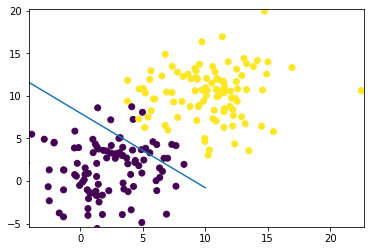

Iteration Number :  38
Current Accuracy : 96.5
Weights are W1 : 18.629341503320823, W2 : 19.79941162604711, W0 : -159.229798918239


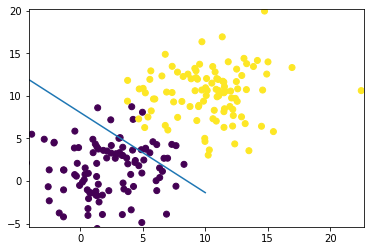

Iteration Number :  39
Current Accuracy : 94.0
Weights are W1 : 12.75214757611316, W2 : 23.34535700587434, W0 : -161.229798918239


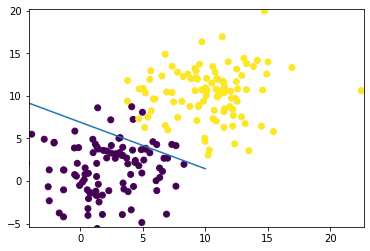

Iteration Number :  40
Current Accuracy : 93.5
Weights are W1 : 20.28881979129629, W2 : 17.922347194071747, W0 : -162.229798918239


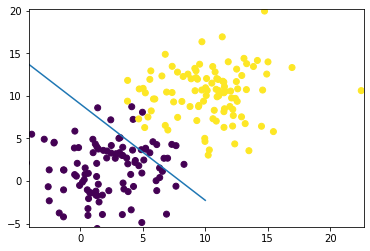

Iteration Number :  41
Current Accuracy : 94.5
Weights are W1 : 20.6914812715152, W2 : 18.563074483342042, W0 : -163.229798918239


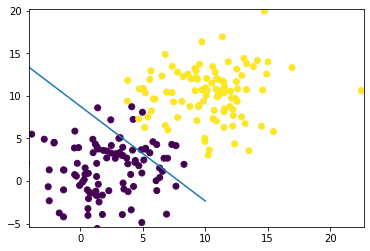

Iteration Number :  42
Current Accuracy : 94.5
Weights are W1 : 15.53678350120797, W2 : 22.81439867443207, W0 : -164.229798918239


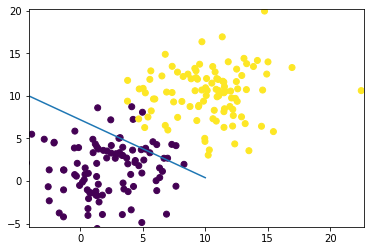

Iteration Number :  43
Current Accuracy : 93.5
Weights are W1 : 15.191243915344229, W2 : 23.135647002638763, W0 : -165.229798918239


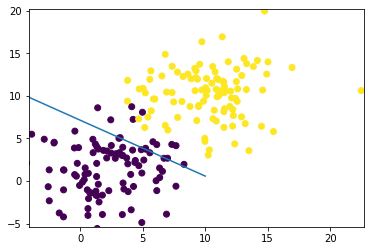

Iteration Number :  44
Current Accuracy : 93.5
Weights are W1 : 16.97321533968497, W2 : 22.693554912606693, W0 : -166.229798918239


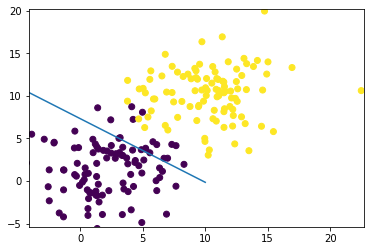

Iteration Number :  45
Current Accuracy : 94.0
Weights are W1 : 19.15425602080017, W2 : 18.731707385638778, W0 : -168.229798918239


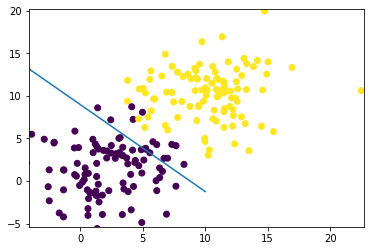

Iteration Number :  46
Current Accuracy : 97.0
Weights are W1 : 18.79281747149733, W2 : 21.708224545685304, W0 : -168.229798918239


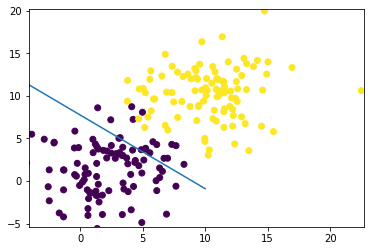

Iteration Number :  47
Current Accuracy : 94.0
Weights are W1 : 13.614362836088324, W2 : 21.95219718689959, W0 : -170.229798918239


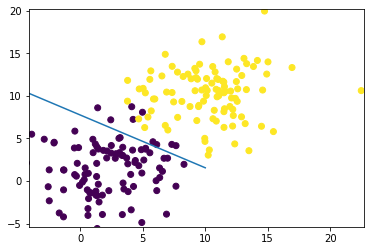

Iteration Number :  48
Current Accuracy : 93.5
Weights are W1 : 16.8190565878511, W2 : 22.10850227643629, W0 : -171.229798918239


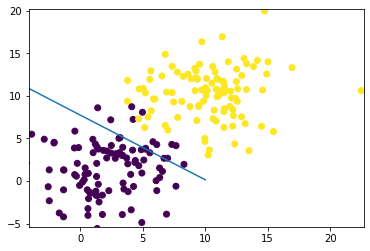

Iteration Number :  49
Current Accuracy : 96.5
Weights are W1 : 14.349605606571247, W2 : 19.64074026074205, W0 : -172.229798918239


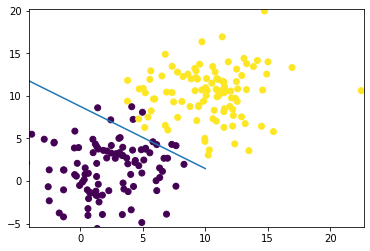

Iteration Number :  50
Current Accuracy : 93.5
Weights are W1 : 21.903912902174056, W2 : 19.146752344555942, W0 : -173.229798918239


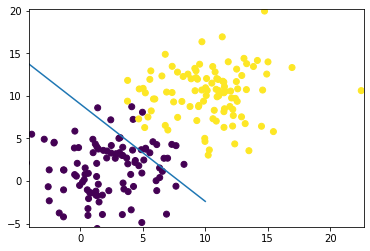

Iteration Number :  51
Current Accuracy : 94.5
Weights are W1 : 16.749215131866826, W2 : 23.39807653564597, W0 : -174.229798918239


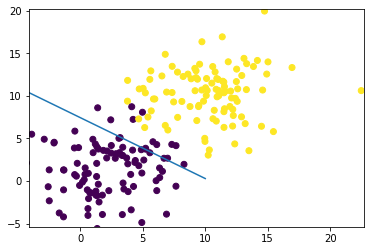

Iteration Number :  52
Current Accuracy : 93.5
Weights are W1 : 16.403675546003086, W2 : 23.719324863852663, W0 : -175.229798918239


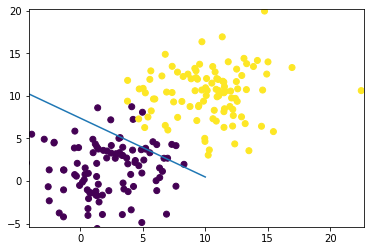

Iteration Number :  53
Current Accuracy : 93.5
Weights are W1 : 16.058135960139346, W2 : 24.040573192059355, W0 : -176.229798918239


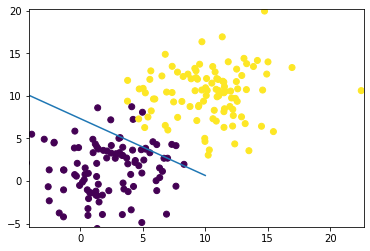

Iteration Number :  54
Current Accuracy : 93.5
Weights are W1 : 15.712596374275604, W2 : 24.361821520266048, W0 : -177.229798918239


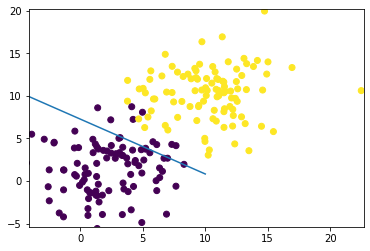

Iteration Number :  55
Current Accuracy : 93.0
Weights are W1 : 18.02918675611391, W2 : 17.030862493326612, W0 : -179.229798918239


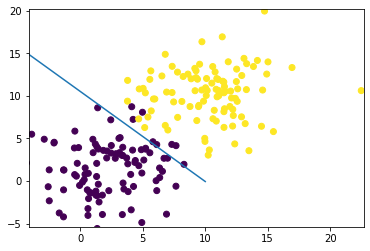

Iteration Number :  56
Current Accuracy : 93.5
Weights are W1 : 22.844080629031403, W2 : 19.007364225458694, W0 : -180.229798918239


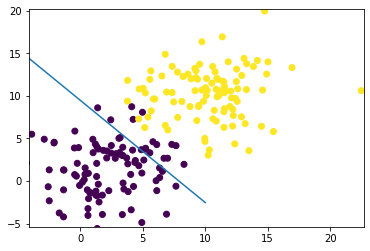

Iteration Number :  57
Current Accuracy : 94.5
Weights are W1 : 17.689382858724173, W2 : 23.258688416548722, W0 : -181.229798918239


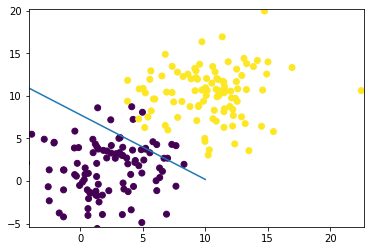

Iteration Number :  58
Current Accuracy : 96.5
Weights are W1 : 15.219931877444319, W2 : 20.79092640085448, W0 : -182.229798918239


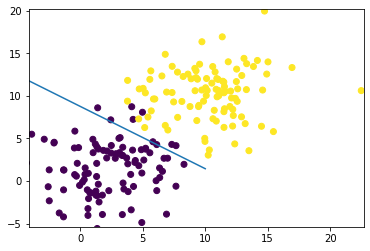

Iteration Number :  59
Current Accuracy : 93.5
Weights are W1 : 23.16220839757201, W2 : 18.895233978337934, W0 : -183.229798918239


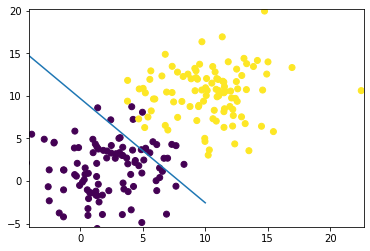

Iteration Number :  60
Current Accuracy : 94.5
Weights are W1 : 18.00751062726478, W2 : 23.146558169427962, W0 : -184.229798918239


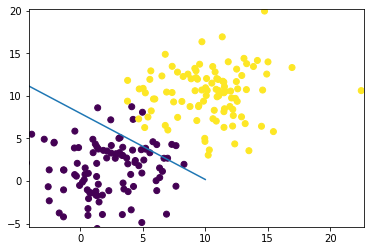

Iteration Number :  61
Current Accuracy : 96.5
Weights are W1 : 15.538059645984925, W2 : 20.67879615373372, W0 : -185.229798918239


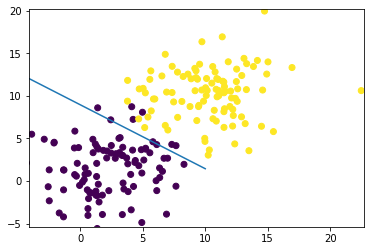

Iteration Number :  62
Current Accuracy : 93.5
Weights are W1 : 23.480336166112615, W2 : 18.783103731217174, W0 : -186.229798918239


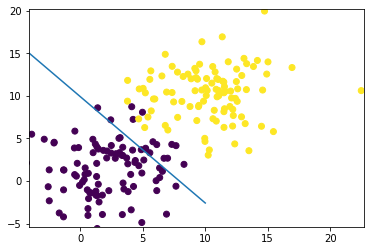

Iteration Number :  63
Current Accuracy : 94.5
Weights are W1 : 23.882997646331525, W2 : 19.42383102048747, W0 : -187.229798918239


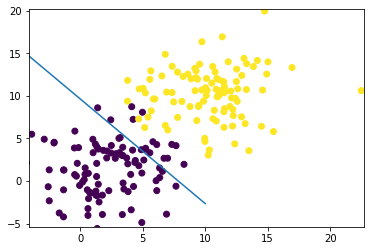

Iteration Number :  64
Current Accuracy : 94.5
Weights are W1 : 18.728299876024295, W2 : 23.675155211577497, W0 : -188.229798918239


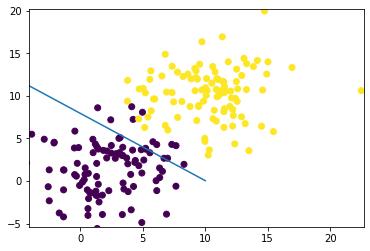

Iteration Number :  65
Current Accuracy : 95.5
Weights are W1 : 15.294885418438168, W2 : 23.211198309587743, W0 : -189.229798918239


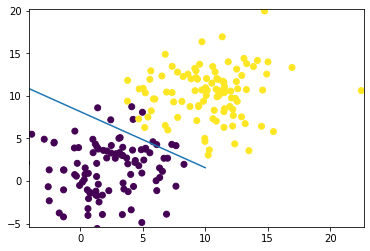

Iteration Number :  66
Current Accuracy : 93.5
Weights are W1 : 17.679802688039715, W2 : 24.92610278889093, W0 : -190.229798918239


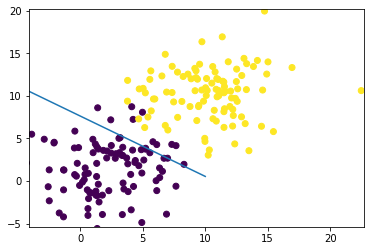

Iteration Number :  67
Current Accuracy : 93.5
Weights are W1 : 17.334263102175974, W2 : 25.247351117097622, W0 : -191.229798918239


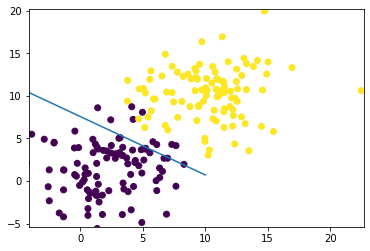

Iteration Number :  68
Current Accuracy : 93.5
Weights are W1 : 16.988723516312234, W2 : 25.568599445304315, W0 : -192.229798918239


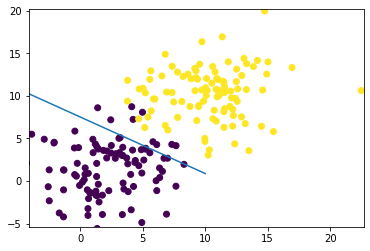

Iteration Number :  69
Current Accuracy : 93.5
Weights are W1 : 23.10267340407333, W2 : 19.54719245393295, W0 : -193.229798918239


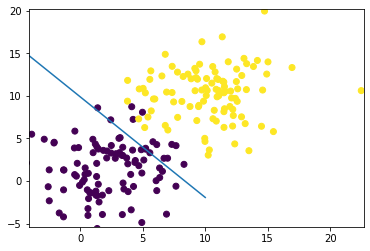

Iteration Number :  70
Current Accuracy : 94.5
Weights are W1 : 23.50533488429224, W2 : 20.187919743203253, W0 : -194.229798918239


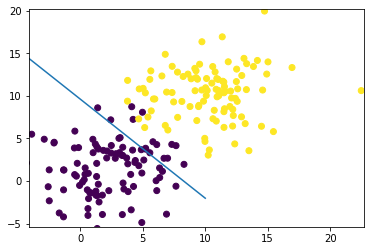

Iteration Number :  71
Current Accuracy : 94.5
Weights are W1 : 18.35063711398501, W2 : 24.43924393429328, W0 : -195.229798918239


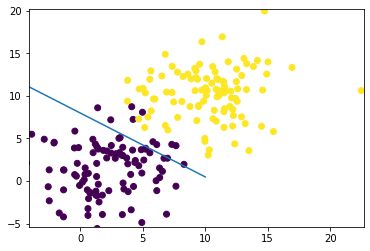

Iteration Number :  72
Current Accuracy : 96.5
Weights are W1 : 15.881186132705158, W2 : 21.97148191859904, W0 : -196.229798918239


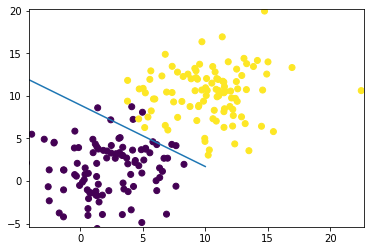

Iteration Number :  73
Current Accuracy : 95.0
Weights are W1 : 23.109457769462665, W2 : 20.357085428797596, W0 : -196.229798918239


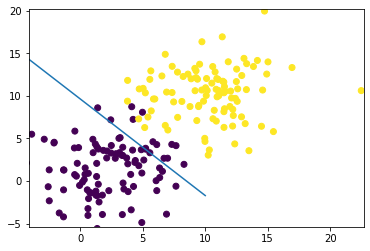

Iteration Number :  74
Current Accuracy : 94.5
Weights are W1 : 19.74550341059868, W2 : 22.221219368225732, W0 : -197.229798918239


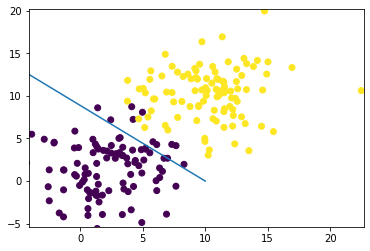

Iteration Number :  75
Current Accuracy : 96.0
Weights are W1 : 24.19953596585944, W2 : 20.658699574649283, W0 : -197.229798918239


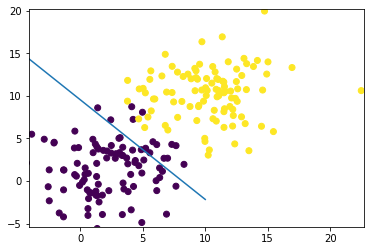

Iteration Number :  76
Current Accuracy : 94.5
Weights are W1 : 19.04483819555221, W2 : 24.91002376573931, W0 : -198.229798918239


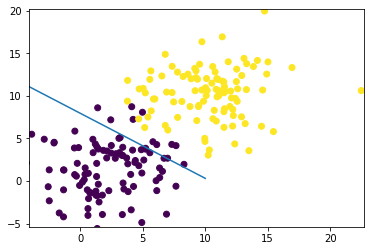

Iteration Number :  77
Current Accuracy : 96.5
Weights are W1 : 16.57538721427236, W2 : 22.44226175004507, W0 : -199.229798918239


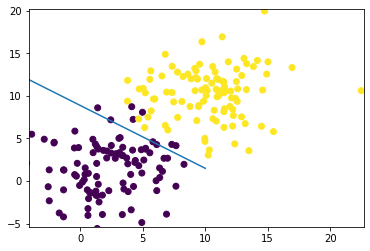

Iteration Number :  78
Current Accuracy : 93.5
Weights are W1 : 21.08781549407839, W2 : 23.393825811109494, W0 : -200.229798918239


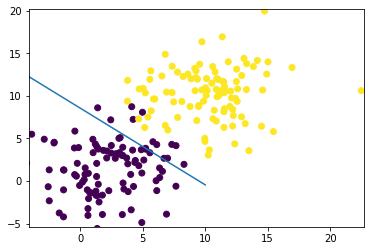

Iteration Number :  79
Current Accuracy : 97.5
Weights are W1 : 14.675192569196467, W2 : 22.17617187116638, W0 : -201.229798918239


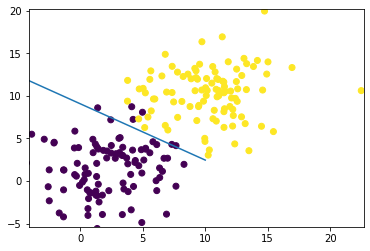

Iteration Number :  80
Current Accuracy : 95.0
Weights are W1 : 21.534678214639513, W2 : 22.70102047717789, W0 : -201.229798918239


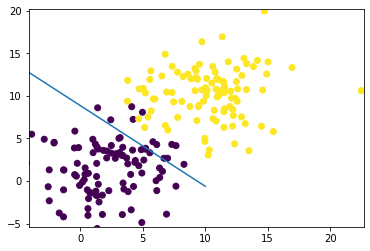

Iteration Number :  81
Current Accuracy : 97.5
Weights are W1 : 15.122055289757588, W2 : 21.483366537234776, W0 : -202.229798918239


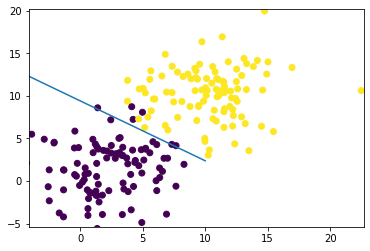

Iteration Number :  82
Current Accuracy : 94.0
Weights are W1 : 24.667164069594378, W2 : 20.367780706334628, W0 : -202.229798918239


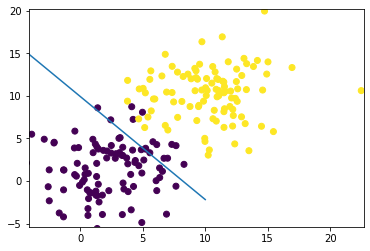

Iteration Number :  83
Current Accuracy : 94.5
Weights are W1 : 19.512466299287148, W2 : 24.619104897424656, W0 : -203.229798918239


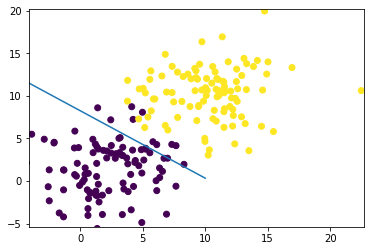

Iteration Number :  84
Current Accuracy : 96.5
Weights are W1 : 19.853830753715293, W2 : 24.170501352225614, W0 : -204.229798918239


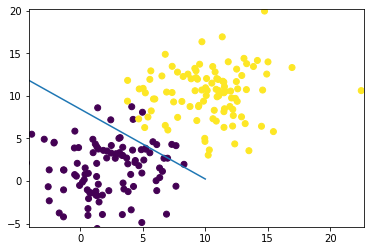

Iteration Number :  85
Current Accuracy : 96.5
Weights are W1 : 20.19519520814344, W2 : 23.721897807026572, W0 : -205.229798918239


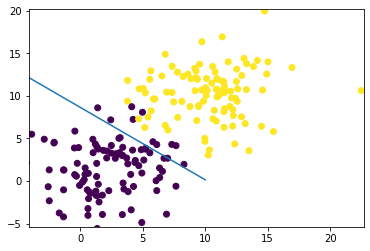

Iteration Number :  86
Current Accuracy : 96.5
Weights are W1 : 20.536559662571584, W2 : 23.27329426182753, W0 : -206.229798918239


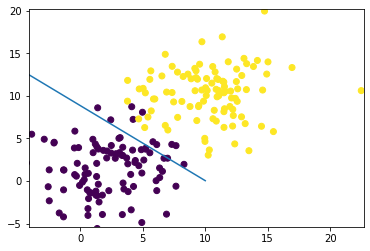

Iteration Number :  87
Current Accuracy : 96.0
Weights are W1 : 24.990592217832344, W2 : 21.71077446825108, W0 : -206.229798918239


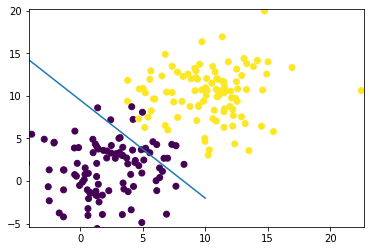

Iteration Number :  88
Current Accuracy : 94.5
Weights are W1 : 19.252896742767973, W2 : 25.388985014906083, W0 : -207.229798918239


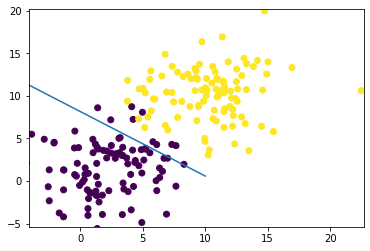

Iteration Number :  89
Current Accuracy : 96.5
Weights are W1 : 19.59426119719612, W2 : 24.94038146970704, W0 : -208.229798918239


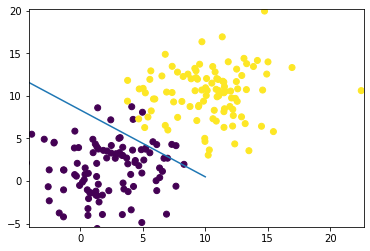

Iteration Number :  90
Current Accuracy : 96.5
Weights are W1 : 19.935625651624264, W2 : 24.491777924508, W0 : -209.229798918239


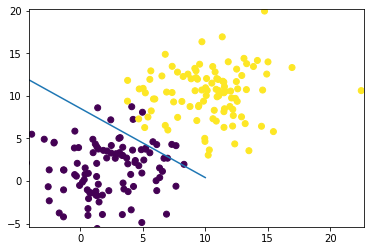

Iteration Number :  91
Current Accuracy : 96.5
Weights are W1 : 20.27699010605241, W2 : 24.043174379308958, W0 : -210.229798918239


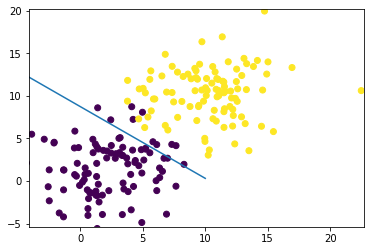

Iteration Number :  92
Current Accuracy : 96.0
Weights are W1 : 24.73102266131317, W2 : 22.48065458573251, W0 : -210.229798918239


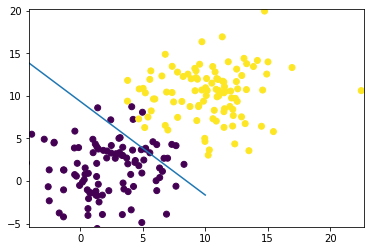

Iteration Number :  93
Current Accuracy : 94.5
Weights are W1 : 18.9933271862488, W2 : 26.15886513238751, W0 : -211.229798918239


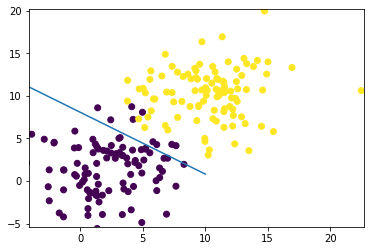

Iteration Number :  94
Current Accuracy : 96.5
Weights are W1 : 19.334691640676944, W2 : 25.71026158718847, W0 : -212.229798918239


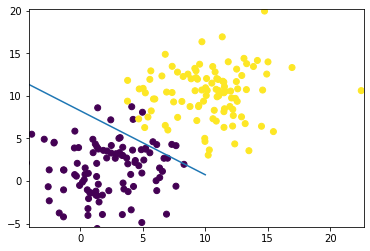

Iteration Number :  95
Current Accuracy : 96.5
Weights are W1 : 19.67605609510509, W2 : 25.261658041989428, W0 : -213.229798918239


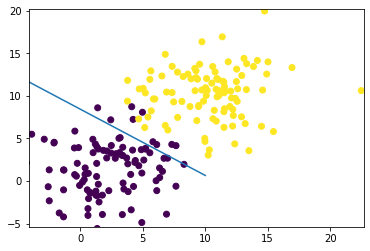

Iteration Number :  96
Current Accuracy : 96.5
Weights are W1 : 20.017420549533234, W2 : 24.813054496790386, W0 : -214.229798918239


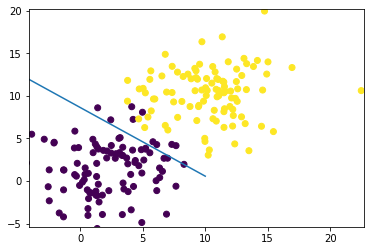

Iteration Number :  97
Current Accuracy : 96.0
Weights are W1 : 24.471453104793994, W2 : 23.250534703213937, W0 : -214.229798918239


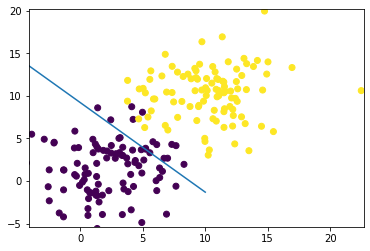

Iteration Number :  98
Current Accuracy : 94.5
Weights are W1 : 18.733757629729624, W2 : 26.928745249868946, W0 : -215.229798918239


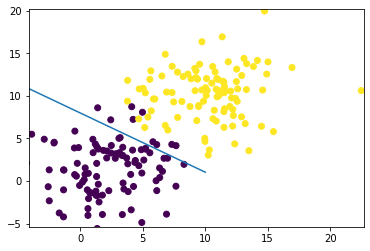

Iteration Number :  99
Current Accuracy : 97.5
Weights are W1 : 18.870091165629162, W2 : 19.977512152196457, W0 : -216.229798918239


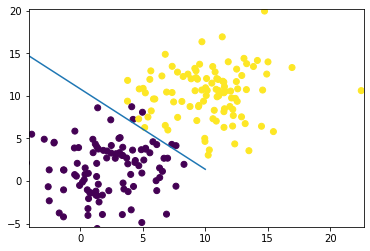

Iteration Number :  100
Current Accuracy : 95.0
Weights are W1 : 18.655983977446205, W2 : 26.871375788954026, W0 : -216.229798918239


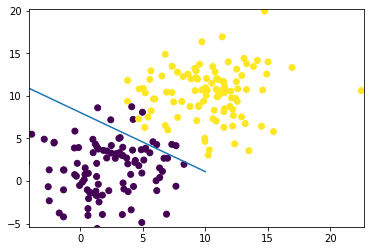

In [ ]:
w,wo=perceptron_training(x,y,w,w0)

## Circle

Moving on to the next concept..

Remember that the decision boundary need not be linear in all cases. For ex:

- We can have a scatter plot, where everything inside a circle belongs to one class, and everything outside belongs to another class.
- In fact, there can be even more complicated decision boundaries.

<br>

> **How to deal with such a case?**

In such a case, we can add another feature / column, which is actually the squared versions of the existing features.

This way, we can perhaps come up with a decision boundary, that is still linear in terms of our features, but geometrically, it is circular (non-linear).


#### Equation of Circle

The general equation of a circle is: $(x-x_c)^2 + (y-y_c)^2 = r^2$

where

- $r$: radius length
- $(x_c, y_c)$: Coordinates of the center of circle

<br>

Hence, for a circle with it's center at Origin, the equation becomes: $x^2 + y^2 = r^2$


#### Classifying a datapoint

Once we have the equation of a circle (decision boundary), we can simply put the coordinates of the datapoint to be classified into the equation.

The resultant value may be:

- +ve: Point lies outside the circle
- -ve: Point lies inside the circle
- = 0: Point lies on the circle


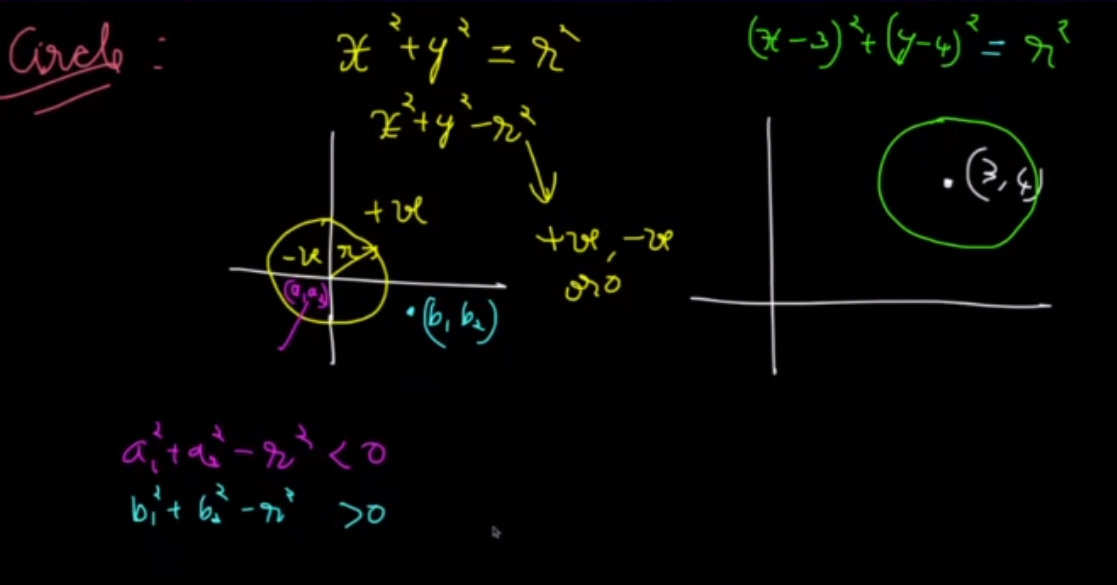
